In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

In [3]:
from monary import Monary
import numpy as np
import pandas as pd
from monary.monary import mvoid_to_bson_id
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import cluster
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_extraction import DictVectorizer

In [11]:
mon = Monary("127.0.0.1")

# Capsule dataframe

In [ ]:
columns = [
    "Capsule id",
    #"date created",
    #"date updated",
    "capsule name",
    "type of author",
    "author user id",
    "is draft",
    "is public",
    "approximate capsule duration"

]
arrays = mon.query(
"educanti", # database name
"capsule", # collection name
{}, # query spec
[
        "_id",
        #"date_created",
        #"date_updated",
        "name",
        "author._ref.$ref",
        "author._ref.$id",
        "publication.is_draft",
        "publication.is_public",
        "approximate_duration"

], # field names (in Mongo record)
[
        "id",
    #   "date",
        #"date",
        "string:100",
        "string:20",
        "id",
        "bool",
        "bool",
        "float32"
  
    ] # Monary field types (see below)
)
df_capsule = np.matrix(arrays).transpose() 

df_capsule = pd.DataFrame(df_capsule, columns=columns)
mvoid_to_bson_id(arrays[0][0])

In [ ]:
df_capsule["Capsule id"] = df_capsule["Capsule id"].apply(mvoid_to_bson_id)
df_capsule["author user id"]=df_capsule["author user id"].apply(mvoid_to_bson_id)
#df["date updated"]=df["date updated"].astype('int').astype("datetime64[ms]")
#df["date created"]=df["date created"].astype('int').astype("datetime64[ms]")
df_capsule["is draft"]=df_capsule["is draft"].apply(lambda x: 1 if x==True else 0)
df_capsule["is public"]=df_capsule["is public"].apply(lambda x: 1 if x==True else 0)
df_capsule["approximate capsule duration"]=df_capsule["approximate capsule duration"].astype('float')

# Export de la base de capsule

In [ ]:
df_capsule.to_csv("BaseCapsule")

# Base de Cartes

In [56]:
from pandas import DataFrame
columns_map = ["Map id",
               "Node"
              ]
unwind_nodes = {"$unwind": "$graph.nodes"}
unwind_edges = {"$unwind": "$graph.edges"}
arrays_map = mon.aggregate(
"educanti", # database name
"map", # collection name
[
        unwind_nodes,
        unwind_edges
    ], # query spec
["_id",
 "graph.nodes.object",
 "name",
 "graph.edges.origin",
 "graph.edges.destination"
], # field names (in Mongo record)
[
        "id",
        "id",
        "string:100",
        "id",
        "id"
    ] # Monary field types (see below)
)
list_map = [{
        "Map Name": arrays_map[2][i],
        "map id": mvoid_to_bson_id(arrays_map[0][i]),
        "Capsule id": mvoid_to_bson_id(arrays_map[1][i]),
        "Origin": mvoid_to_bson_id(arrays_map[3][i]),
        "Destination": mvoid_to_bson_id(arrays_map[4][i])}
            
            for i in range(len(arrays_map[0]))]
df_map = DataFrame.from_dict(list_map)
#TO DO Récupérer uniquement les capsules qui correspondent à des origines ou des destinations

In [52]:
from pandas import DataFrame
columns_map_clean = ["Map id",
               "Node"
              ]
unwind_nodes = {"$unwind": "$graph.nodes"}
arrays_map_clean = mon.aggregate(
"educanti", # database name
"map", # collection name
[
        unwind_nodes
    ], # query spec
["_id",
 "graph.nodes.object",
 "name",
], # field names (in Mongo record)
[
        "id",
        "id",
        "string:100",
    ] # Monary field types (see below)
)
list_map_clean = [{
        "Map Name": arrays_map_clean[2][i],
        "map id": mvoid_to_bson_id(arrays_map_clean[0][i]),
        "Capsule id": mvoid_to_bson_id(arrays_map_clean[1][i])}
            
            for i in range(len(arrays_map_clean[0]))]
df_map_clean = DataFrame.from_dict(list_map_clean)
#TO DO Récupérer uniquement les capsules qui correspondent à des origines ou des destinations

In [53]:
df_map_clean[:20]

,Capsule id,Map Name,map id
0,56f3f55c0a728f32198b421a,Le guide des educantistes,56f407160a728f46042a2e9a
1,56f41b060a728f4dc50623e0,Les différentes parties d'une dissertation,56f420f20a728f4fdae09200
2,56f41b100a728f4dc4cb2ea0,Les différentes parties d'une dissertation,56f420f20a728f4fdae09200
3,56f41b190a728f4dc50623e1,Les différentes parties d'une dissertation,56f420f20a728f4fdae09200
4,56f5212e0a728f4fdb22d472,Les différentes parties d'une dissertation,56f420f20a728f4fdae09200
5,564f6fc10a728f0a68b6b085,Causality and policy evaluation,566023590a728f0bbfcadee9
6,56602a2d0a728f0da5f69aa3,Causality and policy evaluation,566023590a728f0bbfcadee9
7,56602a470a728f0da5f69aa4,Causality and policy evaluation,566023590a728f0bbfcadee9
8,56602a600a728f0da5f69aa5,Causality and policy evaluation,566023590a728f0bbfcadee9
9,56602a7f0a728f0da680bb93,Causality and policy evaluation,566023590a728f0bbfcadee9


In [ ]:
df_test = pd.DataFrame.from_dict({'nodes':['C1','C1','C2','C2','C3','C3'],'Origin':['C1','C1','C1','C1','C1','C1'],'Destination':['C2','C3','C2','C3','C2','C3']})
a_test = df_test[df_test["nodes"] == df_test["Origin"]].groupby('Origin')['Destination'].apply(list)
u_test = pd.DataFrame(a_test).reset_index()
u_test.columns = ['Origin', 'list Destination']
df_test2 = pd.merge(left=u_test, right=df_test, on='Origin', how='inner')
df_test2.drop_duplicates(['Origin'],inplace=True)
df_test2

In [64]:
a = df_map[df_map["Capsule id"] == df_map["Origin"]].groupby('Origin')['Destination'].apply(list)
u = pd.DataFrame(a).reset_index()
u.columns = ['Origin', 'list Destination']
df_map2 = pd.merge(left=u, right=df_map, on='Origin', how = 'inner')
df_map2.drop_duplicates(['Origin'],inplace=True)
df_map2 = df_map2[['Origin', 'list Destination']]
df_map2=df_map2.reset_index(drop=True)
df_map2.head()

,Origin,list Destination
0,564d1d7f0a728f682a81f781,"[564d90020a728f682a82002f, 564d1d8b0a728f682a8..."
1,564d1d8b0a728f682a81f7e8,[564d1da40a728f682a81f8a4]
2,564d8f200a728f682a81fcfb,[564d1d980a728f682a81f846]
3,564d90020a728f682a82002f,[564d8f200a728f682a81fcfb]
4,564dc3e30a728f7559e667dd,"[564dc3f50a728f755ac63cc6, 564dc3f50a728f755ac..."


In [64]:
a = df_map[df_map["Capsule id"] == df_map["Origin"]].groupby('Origin')['Destination'].apply(list)
u = pd.DataFrame(a).reset_index()
u.columns = ['Origin', 'list Destination']
df_map3 = pd.merge(left=u, right=df_map, on='Origin', how = 'inner')
df_map3.drop_duplicates(['Origin'],inplace=True)
df_map3 = df_map3[['Origin', 'list Destination']]
df_map3=df_map2.reset_index(drop=True)
df_map2.head()

,Origin,list Destination
0,564d1d7f0a728f682a81f781,"[564d90020a728f682a82002f, 564d1d8b0a728f682a8..."
1,564d1d8b0a728f682a81f7e8,[564d1da40a728f682a81f8a4]
2,564d8f200a728f682a81fcfb,[564d1d980a728f682a81f846]
3,564d90020a728f682a82002f,[564d8f200a728f682a81fcfb]
4,564dc3e30a728f7559e667dd,"[564dc3f50a728f755ac63cc6, 564dc3f50a728f755ac..."


In [62]:
df_map2

,Origin,list Destination
0,564d1d7f0a728f682a81f781,"[564d90020a728f682a82002f, 564d1d8b0a728f682a8..."
1,564d1d8b0a728f682a81f7e8,[564d1da40a728f682a81f8a4]
2,564d8f200a728f682a81fcfb,[564d1d980a728f682a81f846]
3,564d90020a728f682a82002f,[564d8f200a728f682a81fcfb]
4,564dc3e30a728f7559e667dd,"[564dc3f50a728f755ac63cc6, 564dc3f50a728f755ac..."
5,564dc3ea0a728f755ac63cc5,"[564dc3f50a728f755ac63cc6, 564dc3f50a728f755ac..."
6,564dc3f50a728f755ac63cc6,"[564dc49f0a728f7559e667e0, 564dc4130a728f755ac..."
7,564dc49f0a728f7559e667e0,"[564dc4b20a728f755ac63cc9, 564dc4b20a728f755ac..."
8,564f51b20a728f02c45d5794,"[564f60e60a728f02c45d5796, 564f5f760a728f02c30..."
9,564f5f760a728f02c30bb52c,"[564f51b20a728f02c45d5794, 564f698c0a728f08a8b..."


# Export de la Base Carte

In [67]:
df_map_clean.to_csv("BaseCarte")

# Base Utilisateur

In [ ]:
columns_user = ["user id", "first name", "last name", "date joined"]
arrays_user = mon.query(
"educanti",
"user",
{},
["_id","first_name","last_name","date_joined"],
["id","string:30","string:30","date"],

)
df_user = np.matrix(arrays_user).transpose()
df_user = pd.DataFrame(df_user, columns=columns_user)
df_user["user id"] = df_user["user id"].apply(mvoid_to_bson_id)
df_user["user name"] = df_user["first name"] + " " + df_user["last name"]
df_user["date joined"] = df_user["date joined"].astype("int")
df_user = df_user[["user id","user name", "date joined"]]
df_user

# Export de la base utilisateur 

In [ ]:
df_user.to_csv("BaseUtilisateurs")

# Base de Test Attempts

In [ ]:
columns_test_attempt = [
    "Test Attempt id",
    #"date created",
    #"date updated",
    "Capsule id",
    "user id",
    "is completed",
    "is succeeded",
    "score"

]
arrays_test_attempt = mon.query(
"educanti", # database name
"test_attempt", # collection name
{}, # query spec
[
        "_id",
        #"date_created",
        #"date_updated",
        "test_container._ref.$id",
        "user",
        "is_completed",
        "is_succeeded",
        "score"

], # field names (in Mongo record)
[
        "id",
        #"date",
        #"date",
        "id",
        "id",
        "bool",
        "bool",
        "float32"
  
    ] # Monary field types (see below)
)
df_test_attempt = np.matrix(arrays_test_attempt).transpose() 

df_test_attempt = pd.DataFrame(df_test_attempt, columns=columns_test_attempt)
df_test_attempt["Test Attempt id"] = df_test_attempt["Test Attempt id"].apply(mvoid_to_bson_id)
df_test_attempt["user id"]=df_test_attempt["user id"].apply(mvoid_to_bson_id)
df_test_attempt["Capsule id"]=df_test_attempt["Capsule id"].apply(mvoid_to_bson_id)
#df_test_attempt["date updated"]=df_test_attempt["date updated"].astype('int').astype("datetime64[ms]")
#df_test_attempt["date created"]=df_test_attempt["date created"].astype('int').astype("datetime64[ms]")
df_test_attempt

# Sauvegarde de la base de Test Attempts

In [ ]:
df_test_attempt.to_csv("BaseTestAttempts")

# Let's Play with our Statements

# Question DataSet

In [ ]:
def get_question_number(question):
    l = question.strip(']').split('[')
    n = len(l)
    return l[-1]

In [ ]:
columns_questions = [
    "Capsule id",
    "date created",
    "date updated",
    "user id",
    "test attempt",
    "question number",
    "duration",
    "success"

]
arrays_questions = mon.query(
"educanti", # database name
"statement", # collection name
{"verb.identifier": "http://adlnet.gov/expapi/verbs/answered"}, # query spec
[
        "context.contextActivities.parent.0.object._ref.$id",
        "date_created",
        "date_updated",
        "actor.account.user",
        "object.definition.object._ref.$id",
        "object.definition.sub_element",
        "result.duration",
        "result.success"

], # field names (in Mongo record)
[
        "id",
        "date",
        "date",
        "id",
        "id",
        "string:100",
        "float32",
        "bool"
  
    ] # Monary field types (see below)
)
df_questions = np.matrix(arrays_questions).transpose() 

df_questions = pd.DataFrame(df_questions, columns=columns_questions)

In [ ]:
df_questions["Capsule id"] = df_questions["Capsule id"].apply(mvoid_to_bson_id).astype("string")
df_questions["user id"]=df_questions["user id"].apply(mvoid_to_bson_id).astype("string")
df_questions["test attempt"]=df_questions["test attempt"].apply(mvoid_to_bson_id).astype("string")
df_questions["date updated"]=df_questions["date updated"].astype('int')
df_questions["date created"]=df_questions["date created"].astype('int')
df_questions["question number"]=df_questions["question number"].apply(get_question_number)
df_questions["success"]=df_questions["success"].apply(lambda x: 1 if x==True else 0)
df_questions["duration"]=df_questions["duration"].astype('float')

# Export Base Questions

In [ ]:
df_questions.to_csv("BaseQuestions")

# Amélioration de la base

## Import des bases de données


In [193]:
df_capsule = pd.read_csv("BaseCapsule", index_col=0)
df_user = pd.read_csv("BaseUtilisateurs",index_col=0)
df_test_attempt = pd.read_csv("BaseTestAttempts",index_col=0)
df_questions = pd.read_csv("BaseQuestions",index_col=0)
df_map = pd.read_csv("BaseCarte",index_col=0)
df_liens = pd.read_json("BaseLiens")

ValueError: Expected object or value

In [91]:
df_capsule

,Capsule id,capsule name,type of author,author user id,is draft,is public,approximate capsule duration
0,576a4d4ddfb7b80b7899f179,Bed occupancy rate,user,56f3c71c0a728f321a411592,1,0,0.0
1,576a559cdfb7b80b72ea5f44,La discrimination (essai),user,564f68e80a728f08a779fe6e,1,0,0.0
2,5708cd130a728f3f7b9a942c,Encore une capsule,user,564fa20a0a728f0a68b6b089,1,0,0.0
3,576a5a81dfb7b80b7ef428a9,Data collection - introduction,user,56f3c71c0a728f321a411592,1,0,0.0
4,576a5dd3dfb7b80b75dd5ff0,Data and indicators - Definition,user,56f3c71c0a728f321a411592,1,0,0.0
5,570d2c060a728f61ed86ce69,Reporting hazard,user,570d1e3f0a728f61ed86cbb6,1,0,0.0
6,570f71ba0a728f6e2bb5f77a,Qu'est-ce qu'une forge logicielle ?,user,570f6ebb0a728f61eefc60fa,1,0,0.0
7,570f71c40a728f6e2c29fd74,Gestion des bugs,user,570f6ebb0a728f61eefc60fa,1,0,0.0
8,570f71cc0a728f6e2bb5f77b,Gestion des versions,user,570f6ebb0a728f61eefc60fa,1,0,0.0
9,570f71da0a728f6e2c29fd75,IDE,user,570f6ebb0a728f61eefc60fa,1,0,0.0


In [70]:
df_liens = df_liens.rename(columns={'Origin':'Capsule id'})
df_map.head()

,Capsule id,Map Name,map id
0,56f3f55c0a728f32198b421a,Le guide des educantistes,56f407160a728f46042a2e9a
1,56f41b060a728f4dc50623e0,Les différentes parties d'une dissertation,56f420f20a728f4fdae09200
2,56f41b100a728f4dc4cb2ea0,Les différentes parties d'une dissertation,56f420f20a728f4fdae09200
3,56f41b190a728f4dc50623e1,Les différentes parties d'une dissertation,56f420f20a728f4fdae09200
4,56f5212e0a728f4fdb22d472,Les différentes parties d'une dissertation,56f420f20a728f4fdae09200


In [71]:
df_test_attempt = pd.read_csv("BaseTestAttempts",index_col=0)
df_test_attempt = df_test_attempt.rename(columns={'Test Attempt id':'test attempt'})[['test attempt','is completed','is succeeded','score']]

In [72]:
df_questions_user = pd.merge(left=df_user,right=df_questions,on="user id",how ='inner')

In [73]:
df_questions_user_capsule = pd.merge(left=df_capsule,right=df_questions_user,on="Capsule id",how ='inner')

In [74]:
df_user = df_user.rename(columns={'user id': 'author user id','user name':'author user name'})

In [75]:
df_questions_user_author_capsule = pd.merge(left=df_user[["author user id","author user name"]],right=df_questions_user_capsule,on="author user id",how ='inner')

In [76]:
df_questions_user_author_capsule_test = pd.merge(left=df_test_attempt,right=df_questions_user_author_capsule,on="test attempt",how='inner')
df_questions_user_author_capsule_test["is completed"]=df_questions_user_author_capsule_test["is completed"].apply(lambda x: 1 if x==True else 0)
df_questions_user_author_capsule_test["is succeeded"]=df_questions_user_author_capsule_test["is succeeded"].apply(lambda x: 1 if x==True else 0)

In [77]:
df_questions_user_author_capsule_test["is user author"] = (df_questions_user_author_capsule_test["author user id"] == df_questions_user_author_capsule_test["user id"]).apply(lambda x: 1 if x==True else 0)

In [78]:
df_all_map = pd.merge(left=df_questions_user_author_capsule_test,right=df_map,on="Capsule id",how = 'left')

In [84]:
df_all_map = df_all_map.dropna()

In [86]:
df = pd.merge(left=df_liens, right=df_all_map,on='Capsule id', how = 'right')

In [87]:
df.to_csv("BaseFinale")

# Commencer ici

In [124]:
df = pd.read_csv("BaseFinale",index_col=0)
base_continent = df[df["Map Name"] == "Naissance d'une théorie:  de la dérive des continents à l'expansion océanique"]
base_regard = df[df['Map Name'] == "Transformer son regard"]
base_autres = df[df['Map Name'] == "Transformer les autres"]
base_adn = df[(df['Map Name'] == "L'ADN [copy] [copie]") |(df['Map Name'] == "L'ADN [copy]") | (df['Map Name'] == "L'ADN")]

In [127]:
base_autres["capsule name"].value_counts()

La force des croyances                  255
Les  mythes  à propos du leadership     199
L'équation  du leadership               139
Le leadership charismatique              30
Name: capsule name, dtype: int64

# Base de travail

In [ ]:
new_columns = [
    "is completed",
    "is succeeded",
    "score",
    #"type of author",
    "is draft",
    "is public",
    'approximate capsule duration',
    "date joined",
    "date created",
    "date updated",
    "question number",
    "duration",
    "success",
    "is user author"
]
df = df[new_columns]
df.head()

# Traitement Base de Données

In [ ]:
numerique = [ c for c,d in zip(df.columns,df.dtypes) if d == np.int64 and c not in ["success"] ]
categories = [ c for c in df.columns if c not in numerique and c not in ["success"] ]
target = "success"
num = df[ numerique ]
cat = df[ categories ]
tar = df[ target ]
prep = DictVectorizer()
cat_as_dicts = [dict(r.iteritems()) for _, r in cat.iterrows()]
temp = prep.fit_transform(cat_as_dicts)
cat_exp = temp.toarray()
cat_exp_df = pd.DataFrame( cat_exp, columns = prep.feature_names_ )
X = (pd.concat ( [ num, cat_exp_df ], axis= 1))
Y = (tar)

# Machine Learning


In [ ]:
from sklearn.cross_validation import train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state = 0)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import GradientBoostingClassifier


clf = Pipeline([
      ('normalize', Normalizer()),
      ('classifier', GradientBoostingClassifier(random_state = 1))
    ])
clf2 = XGBClassifier(missing=np.nan,gamma = 1.5, max_depth=50, n_estimators=350, learning_rate=0.01, nthread=30, subsample=0.95, colsample_bytree=0.90, seed=4242)
clf2 = clf2.fit(X_train, Y_train.ravel())

In [ ]:
from sklearn.metrics import confusion_matrix
for x,y in [ (X_train, Y_train), (X_test, Y_test) ]:
    yp  = clf2.predict(x)
    cm = confusion_matrix(y.ravel(), yp.ravel())
    print(cm)
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
savefig("conf_mat1.png")

In [ ]:
cm

In [ ]:
from sklearn import metrics
metrics.classification_report(Y_test,clf2.predict(X_test))

In [ ]:
from sklearn.metrics import roc_curve, auc
probas = clf2.predict_proba(X_test)
probas[:5]

In [ ]:
rep = [ ]
yt = Y_test.ravel()
for i in range(probas.shape[0]):
    p0,p1 = probas[i,:]
    exp = yt[i]
    if p0 > p1 :
        if exp == 0 :
            # bonne réponse
            rep.append ( (1, p0) )
        else :
            # mauvaise réponse
            rep.append( (0,p0) )
    else :
        if exp == 0 :
            # mauvaise réponse
            rep.append ( (0, p1) )
        else :
            # bonne réponse
            rep.append( (1,p1) )
mat_rep = numpy.array(rep)
mat_rep[:5]
mat_rep

In [ ]:
"taux de bonne réponse",sum(mat_rep[:,0]/len(mat_rep)) # voir matrice de confusion

In [ ]:
fpr, tpr, thresholds = roc_curve(mat_rep[:,0], mat_rep[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
savefig("ROC.png")

# Bayes Network MotherF####R

In [128]:
base = base_autres.copy()
base

,Capsule id,list Destination,test attempt,is completed,is succeeded,score,author user id,author user name,capsule name,type of author,...,user name,date joined,date created,date updated,question number,duration,success,is user author,Map Name,map id
5041,5672b5c70a728f5039553769,[u'5672b60e0a728f503955377d'],56a65d4c0a728f55f4714ede,1,0,0.666667,567294c00a728f5039553742,Different Leaders,La force des croyances,user,...,Sidibe Salifou,1453481014000,1467818376382,1467818376431,0,26.653000,1,0,Transformer les autres,56619dec0a728f18a76b8592
5042,5672b5c70a728f5039553769,[u'5672b60e0a728f503955377d'],56a65d4c0a728f55f4714ede,1,0,0.666667,567294c00a728f5039553742,Different Leaders,La force des croyances,user,...,Sidibe Salifou,1453481014000,1467818376439,1467818376442,1,15.639000,0,0,Transformer les autres,56619dec0a728f18a76b8592
5043,5672b5c70a728f5039553769,[u'5672b60e0a728f503955377d'],56a65d4c0a728f55f4714ede,1,0,0.666667,567294c00a728f5039553742,Different Leaders,La force des croyances,user,...,Sidibe Salifou,1453481014000,1467818376454,1467818376460,2,33.560001,1,0,Transformer les autres,56619dec0a728f18a76b8592
5044,5672b5c70a728f5039553769,[u'5672b60e0a728f503955377d'],56a65dcf0a728f55f4714f35,1,1,1.000000,567294c00a728f5039553742,Different Leaders,La force des croyances,user,...,Sidibe Salifou,1453481014000,1467818376471,1467818376519,0,5.371000,1,0,Transformer les autres,56619dec0a728f18a76b8592
5045,5672b5c70a728f5039553769,[u'5672b60e0a728f503955377d'],56a65dcf0a728f55f4714f35,1,1,1.000000,567294c00a728f5039553742,Different Leaders,La force des croyances,user,...,Sidibe Salifou,1453481014000,1467818376529,1467818376532,1,18.455000,1,0,Transformer les autres,56619dec0a728f18a76b8592
5046,5672b5c70a728f5039553769,[u'5672b60e0a728f503955377d'],56a65dcf0a728f55f4714f35,1,1,1.000000,567294c00a728f5039553742,Different Leaders,La force des croyances,user,...,Sidibe Salifou,1453481014000,1467818376539,1467818376543,2,7.877000,1,0,Transformer les autres,56619dec0a728f18a76b8592
5047,5672b5c70a728f5039553769,[u'5672b60e0a728f503955377d'],56a6646f0a728f55f528393e,1,1,1.000000,567294c00a728f5039553742,Different Leaders,La force des croyances,user,...,Arnaud Riegert,1448059402000,1467818376558,1467818376604,0,6.681000,1,0,Transformer les autres,56619dec0a728f18a76b8592
5048,5672b5c70a728f5039553769,[u'5672b60e0a728f503955377d'],56a6646f0a728f55f528393e,1,1,1.000000,567294c00a728f5039553742,Different Leaders,La force des croyances,user,...,Arnaud Riegert,1448059402000,1467818376616,1467818376619,1,15.600000,1,0,Transformer les autres,56619dec0a728f18a76b8592
5049,5672b5c70a728f5039553769,[u'5672b60e0a728f503955377d'],56a6646f0a728f55f528393e,1,1,1.000000,567294c00a728f5039553742,Different Leaders,La force des croyances,user,...,Arnaud Riegert,1448059402000,1467818376626,1467818376629,2,7.693000,1,0,Transformer les autres,56619dec0a728f18a76b8592
5050,5672b5c70a728f5039553769,[u'5672b60e0a728f503955377d'],56a666ed0a728f59e73f18dd,0,0,0.000000,567294c00a728f5039553742,Different Leaders,La force des croyances,user,...,Arnaud Riegert,1448059402000,1467818376643,1467818376688,0,9.430000,0,0,Transformer les autres,56619dec0a728f18a76b8592


In [131]:
list_nom = dict(set([(b,a) for a,b in (base[["capsule name","Capsule id"]].values)]))
list_orig_dest = dict(set([(a,b) for a,b in (base[["Capsule id","list Destination"]].values)]))

In [132]:
list_capsule = {}
for id_c in list_nom.keys():
    list_capsule[id_c] = base[base["Capsule id"] == id_c]
    list_capsule[id_c].drop("Capsule id", axis=1, inplace = True)
    list_capsule[id_c].sort("date created")
    list_capsule[id_c].drop([
                            "date created",
                             "date joined",
                             'date updated',
                             'author user name',
                             'user name',
                             'type of author',
                             'user id',
                             'author user id',
                             'test attempt',
                             'capsule name',
                             'Map Name',
                             'map id',
                             'list Destination',
                             'is draft',
                             'is public'
                                
                            ], axis=1, inplace=True)
    list_capsule[id_c]["delta approximate real duration"] = list_capsule[id_c]["approximate capsule duration"] - \
                                                            list_capsule[id_c]["duration"]
    list_capsule[id_c].drop(["approximate capsule duration"], axis=1, inplace=True)
    list_capsule[id_c].reset_index

In [8]:
list_capsule['5661a37a0a728f18a8dc9501'].head()

,is completed,is succeeded,score,question number,duration,success,is user author,delta approximate real duration
3671,0,0,0.0,0,569.854004,0,0,30.145996
3672,0,0,0.0,0,77.961998,0,0,522.038002
3673,0,0,0.0,0,47.632000,0,0,552.368000
3674,0,0,0.0,0,12.479000,0,0,587.521000
3675,0,0,0.0,1,3.110000,0,0,596.890000


In [16]:
-

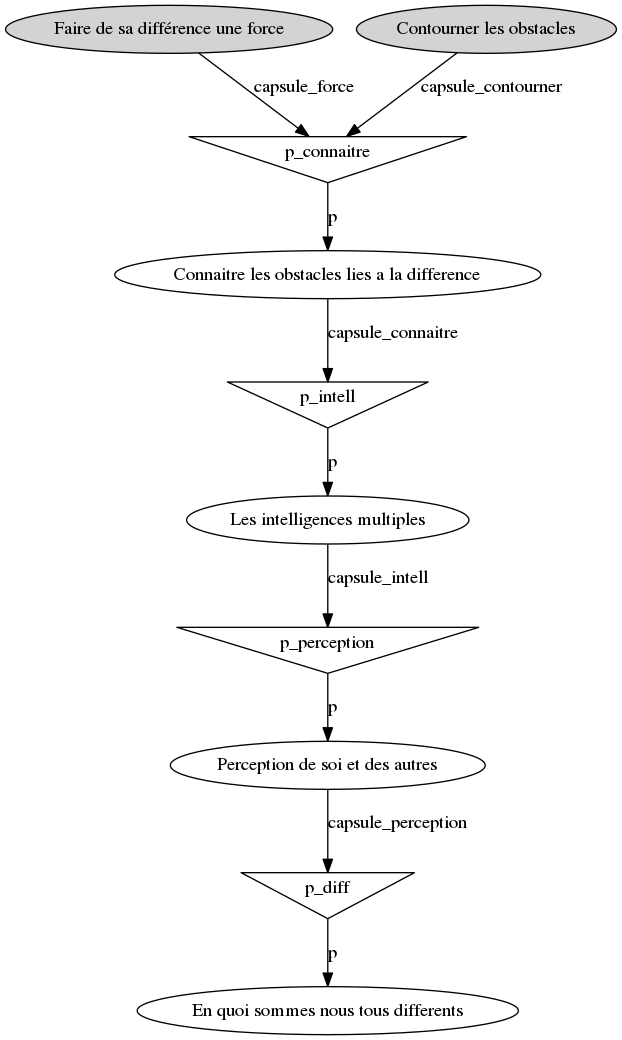

In [17]:
from pymc import Model
from pymc.graph import dag, graph
import pydot
from IPython.display import Image, display
model = Model([capsule_force, capsule_contourner, capsule_connaitre, capsule_intell, capsule_perception, capsule_diff])
graph1 = graph(model)
Image(graph1.create_png())

In [297]:
from pymc import MCMC
M = MCMC(model)
M.sample(iter=10000, burn=1000, thin=10)

In [293]:
M.sample(iter=10000, burn=1000, thin=10)
M

In [29]:
from logregbayes import logistic_setup

list_param_questions = {}
for key, value in list_capsule.iteritems():
    df = list_capsule[key]
    ind_cols = df.columns
    ind_cols.drop('success')
    list_param_questions[key] = logistic_setup(df, ind_cols, "success")

In [ ]:
np.array(list_param_questions.values()).ravel()

## Modèle où l'on considère que la probabilité de bien répondre à une question est le nombre de bonne réponse sur le nombre total de réponses

In [50]:
capsule = list_capsule['5661a37a0a728f18a8dc9501']
dict_probas = {}
for capsule_id, capsule in list_capsule.iteritems():
    n_questions = capsule["question number"].max()
    list_proba_capsule = np.zeros(n_questions)
    for i in range(n_questions):
        list_proba_capsule[i] = capsule[capsule["question number"] == i]["success"].mean()
    dict_probas[capsule_id] = list_proba_capsule
len(dict_probas)

6

In [133]:
dict_questions = {}
for capsule_id, capsule in list_capsule.iteritems():
    n_questions = capsule["question number"].max()
    dict_questions[capsule_id] = n_questions
dict_questions

{'5672b5c70a728f5039553769': 6,
 '5672b5df0a728f5039553773': 6,
 '5672b5fd0a728f5038d2dd07': 5,
 '577137d1dfb7b80c3ad1b5ee': 4}

In [145]:
u = []
for a,b in dict_probas.iteritems():
    u.append(min(b))
u

[0.0,
 0.13333333333333333,
 0.1134020618556701,
 0.15151515151515152,
 0.20000000000000001,
 0.079545454545454544]

In [113]:
from pymc import Bernoulli, Lambda, Container

capsule_dict = {}

for capsule_id, probas in dict_probas.iteritems():
    question = []
    capsule = list_capsule[capsule_id]
    for i,a in enumerate(probas):
        question.append(Bernoulli('capsule_'+capsule_id + 'question_'+ str(i),p=max(1e-6,a), value = capsule[capsule['question number'] == i]['success'], observed = True))
    question_pm = Container(question)
    p_validated = Lambda('p_validated_'+capsule_id, lambda question=question_pm: np.where(0. in question_pm, 1e-6,1.) )
    capsule_dict[capsule_id] = (question, Bernoulli('capsule_'+capsule_id, p=p_validated))
    #capsule[capsule_id] = Bernoulli('capsule_'+capsule_id, p=p_validated)
    
"""capsule_force = Bernoulli('Faire de sa différence une force', value = np.array([0]), observed=True, p=1/2)
capsule_contourner = Bernoulli('Contourner les obstacles', value = np.array([0]), observed=True, p=1/2)
p_connaitre = Lambda('p_connaitre', 
                     lambda capsule_contourner=capsule_contourner,
                     capsule_force=capsule_force:
                     np.where(capsule_force, np.where(capsule_contourner, 0.6,0.55),np.where(capsule_contourner, 0.55,0.5)))
capsule_connaitre = Bernoulli('Connaitre les obstacles lies a la difference', p=p_connaitre)
p_intell = Lambda('p_intell', lambda capsule_connaitre=capsule_connaitre: np.where(capsule_connaitre,.55,.5))
capsule_intell = Bernoulli('Les intelligences multiples', p=p_intell)
p_perception = Lambda('p_perception', lambda capsule_intell=capsule_intell: np.where(capsule_intell,.55,.5))
capsule_perception = Bernoulli('Perception de soi et des autres', p=p_perception)
p_diff = Lambda('p_diff', lambda capsule_perception=capsule_perception: np.where(capsule_perception,.55,.5))
capsule_diff = Bernoulli('En quoi sommes nous tous differents', p=p_diff)"""

NameError: name 'dict_probas' is not defined

In [108]:
from pymc import Model
m2 = Model(np.array((capsule_dict.values())).ravel())

In [147]:
list_capsule['5661a37a0a728f18a8dc9501'].head()

,is completed,is succeeded,score,question number,duration,success,is user author,delta approximate real duration,5661a37a0a728f18a8dc9501
3671,0,0,0.0,0,569.854004,0,0,30.145996,capsule_5661a37a0a728f18a8dc9501
3672,0,0,0.0,0,77.961998,0,0,522.038002,capsule_5661a37a0a728f18a8dc9501
3673,0,0,0.0,0,47.632000,0,0,552.368000,capsule_5661a37a0a728f18a8dc9501
3674,0,0,0.0,0,12.479000,0,0,587.521000,capsule_5661a37a0a728f18a8dc9501
3675,0,0,0.0,1,3.110000,0,0,596.890000,capsule_5661a37a0a728f18a8dc9501


In [124]:
from pymc import Model
m3 = Model(np.array((capsule_dict.values()[0])).ravel())

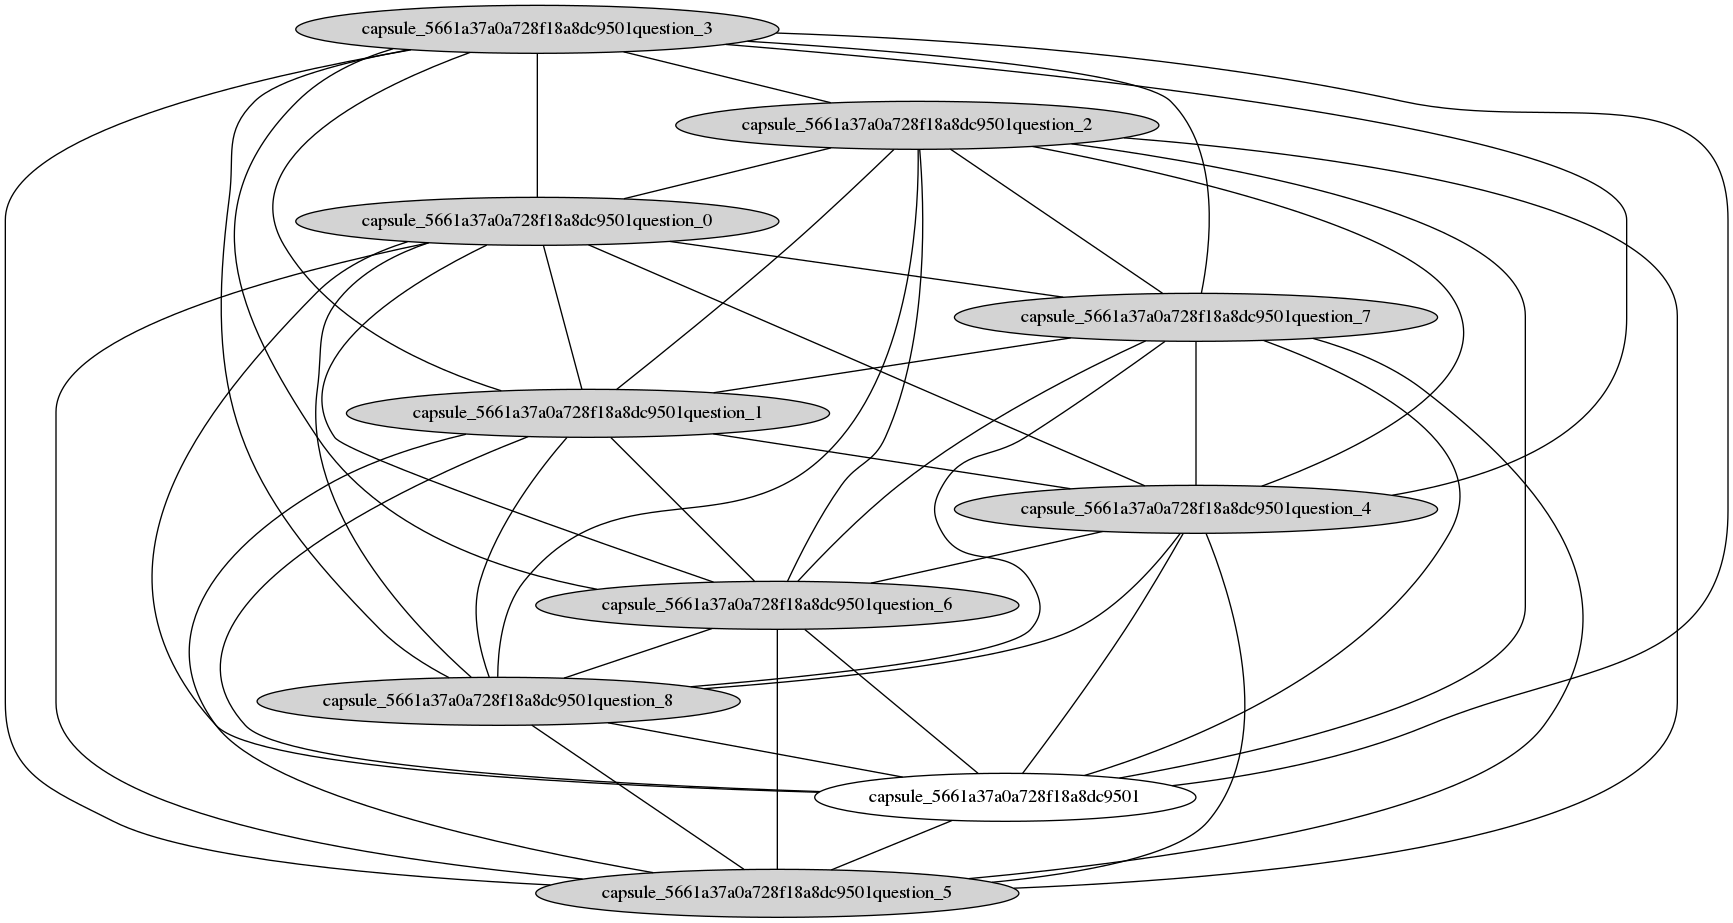

In [126]:
from pymc import Model
from pymc.graph import dag, graph, moral_graph
import pydot
from IPython.display import Image, display
model = Model(capsule_dict.values())
graph1 = moral_graph(m3)
Image(graph1.create_png())

In [160]:
from pymc import DiscreteUniform, Uniform, Bernoulli

alpha = Uniform('alpha', lower=0., upper=1.)
beta = Uniform('beta',lower=alpha, upper=1.)
mu = Uniform('mu', lower=0., upper=1.)
ksi = Uniform('ksi',lower=mu, upper=1.)
capsule_dict = {}
for capsule_id, nom in list_nom.iteritems():
    if list_orig_dest[capsule_id] is nan:
        capsule_dict[capsule_id] = Bernoulli('capsule_'+nom, p=0.5)

In [163]:
capsule_dict

{'5672b5c70a728f5039553769': <pymc.distributions.Bernoulli 'capsule_La force des croyances' at 0x7fac397cde90>,
 '5672b5df0a728f5039553773': <pymc.distributions.Bernoulli 'capsule_L'équation  du leadership' at 0x7fac397cdbd0>,
 '5672b5fd0a728f5038d2dd07': <pymc.distributions.Bernoulli 'capsule_Les  mythes  à propos du leadership ' at 0x7fac39740350>,
 '577137d1dfb7b80c3ad1b5ee': <pymc.distributions.Bernoulli 'capsule_Le leadership charismatique' at 0x7fac3984f4d0>}

In [162]:
from pymc import Lambda, Deterministic
S = {}
for capsule_id, list_dest in list_orig_dest.iteritems():
    if list_orig_dest[capsule_id] is not nan:
        dict_dest = {capsule_id_dest: value for capsule_id_dest, value in capsule_dict.iteritems() if capsule_id_dest in list_dest}
        @pymc.deterministic(name="S_"+list_nom[capsule_id], plot=False)
        def S_i(list_val=dict_dest.values()):
            return (sum(dict_dest.values()))/float(len(dict_dest))
        S[capsule_id] = S_i
        p1 = (S[capsule_id]*mu + (1-S[capsule_id])*ksi)
        capsule_dict[capsule_id] = Bernoulli('capsule_'+list_nom[capsule_id], p=max(1e-6,p1))
dict_dest


{'5672b5df0a728f5039553773': <pymc.distributions.Bernoulli 'capsule_L'équation  du leadership' at 0x7fac397cdbd0>}

In [164]:
S

{'5672b5c70a728f5039553769': <pymc.PyMCObjects.Deterministic 'S_La force des croyances' at 0x7fac397cdd50>,
 '5672b5df0a728f5039553773': <pymc.PyMCObjects.Deterministic 'S_L'équation  du leadership' at 0x7fac397cda90>,
 '5672b5fd0a728f5038d2dd07': <pymc.PyMCObjects.Deterministic 'S_Les  mythes  à propos du leadership ' at 0x7fac397cdf90>}

In [165]:
import pymc
question_va_dict = {}
for capsule_id, capsule in capsule_dict.iteritems():
    capsule_df = list_capsule[capsule_id]
    for i in range(dict_questions[capsule_id]):
        p_question = capsule*beta+(1-capsule)*alpha
        question_va_dict[(i,capsule_id)] = Bernoulli("question_"+str(i+1)+"_capsule_"+list_nom[capsule_id],
                                                    p=max(1e-6,p_question),
                                                    value=capsule_df[capsule_df["question number"]==i]["success"],
                                                    observed=True
                                                    )

In [ ]:
question_va_dict.values()

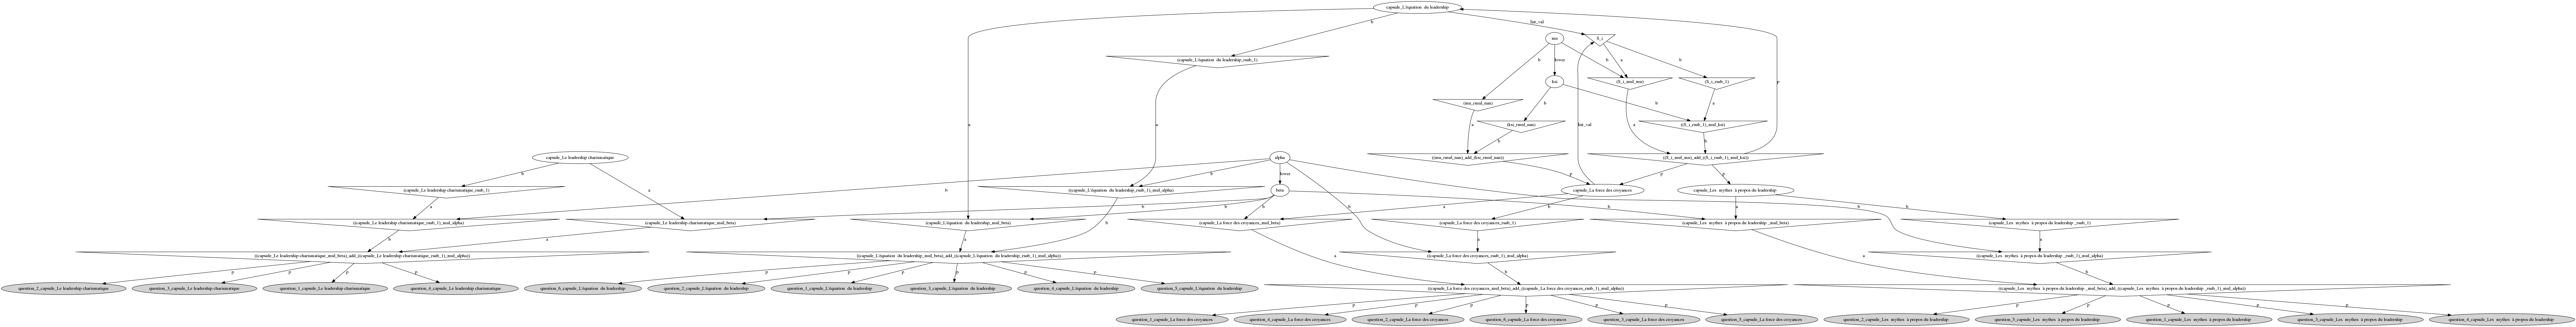

In [151]:
from pymc import Model
from pymc.graph import dag, graph, moral_graph
from IPython.display import Image, display

model = Model([alpha,beta, mu, ksi]+capsule_dict.values()+S.values()+question_va_dict.values())
graph = graph(model)
Image(graph.create_png())

In [ ]:
from pymc import MCMC
M = MCMC([alpha,beta, mu, ksi]+capsule_dict.values()+S.values()+question_va_dict.values())
M.sample(iter=50000, burn=100, thin=10)

In [23]:
from pymc.Matplot import plot
len(M.trace("mu")[:])

990

In [155]:
M.stats()

{'S5672b5c70a728f5039553769': {'95% HPD interval': array([ nan,  nan]),
  'mc error': nan,
  'mean': nan,
  'n': 990,
  'quantiles': {2.5: nan, 25: nan, 50: nan, 75: nan, 97.5: nan},
  'standard deviation': nan},
 'S5672b5df0a728f5039553773': {'95% HPD interval': array([ 0.,  0.]),
  'mc error': 0.0,
  'mean': 0.0,
  'n': 990,
  'quantiles': {2.5: 0.0, 25: 0.0, 50: 0.0, 75: 0.0, 97.5: 0.0},
  'standard deviation': 0.0},
 'S5672b5fd0a728f5038d2dd07': {'95% HPD interval': array([ 1.,  1.]),
  'mc error': 0.0,
  'mean': 1.0,
  'n': 990,
  'quantiles': {2.5: 1.0, 25: 1.0, 50: 1.0, 75: 1.0, 97.5: 1.0},
  'standard deviation': 0.0},
 'alpha': {'95% HPD interval': array([ 0.31481572,  0.37163523]),
  'mc error': 0.0010586166279061347,
  'mean': 0.34384337329693293,
  'n': 990,
  'quantiles': {2.5: 0.3148157175169648,
   25: 0.33461878790419397,
   50: 0.34377491611735367,
   75: 0.35233123393310123,
   97.5: 0.37603154947295953},
  'standard deviation': 0.014596510652835931},
 'beta': {'95% H

In [147]:
list_orig_dest

{'5672b5c70a728f5039553769': "[u'5672b60e0a728f503955377d']",
 '5672b5df0a728f5039553773': "[u'5672b5c70a728f5039553769']",
 '5672b5fd0a728f5038d2dd07': "[u'5672b5df0a728f5039553773']",
 '577137d1dfb7b80c3ad1b5ee': nan}

In [143]:
dict_trace = {}
for parameter in ["alpha","beta","mu","ksi"]:
    dict_trace[parameter] = M.trace(parameter)[:]
for capsule_id, nom in list_nom.iteritems():
    dict_trace[nom] = M.trace("capsule_"+nom)[:]
dict_trace
df_trace = pd.DataFrame.from_dict(dict_trace)
df_trace

,L'équation du leadership,La force des croyances,Le leadership charismatique,Les mythes à propos du leadership,alpha,beta,ksi,mu
0,True,False,True,False,0.381406,0.397288,0.866008,0.386538
1,False,False,True,True,0.347246,0.397288,0.837221,0.239636
2,False,False,True,False,0.347246,0.435192,0.743715,0.619517
3,False,False,True,False,0.334810,0.447430,0.076609,0.042949
4,False,False,True,False,0.357673,0.405464,0.674458,0.608895
5,False,False,False,False,0.357673,0.612039,0.523252,0.329189
6,False,False,False,False,0.335603,0.800339,0.503453,0.491534
7,False,False,False,False,0.324021,0.546968,0.632804,0.557352
8,False,False,True,False,0.353787,0.409807,0.642280,0.529222
9,False,False,False,False,0.345356,0.908163,0.735025,0.520317
